In [488]:
import copy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import load_data_template
from src.features.games import GameFeatures

In [573]:
data = load_data_template()

In [577]:
game_feat = GameFeatures(default_lags=5)
data = load_data_template()
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_season, fillna=0)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney, fillna=0)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_season_against_opponent, fillna=0, per_game=True)
data = game_feat.per_team_wrapper(data, game_feat.games_won_in_tourney_against_opponent, fillna=0, per_game=True)
data.sample()

,Season,team_a,team_b,in_target,game_set,a_win,DayNum,games_won_in_season_team_a,games_won_in_season_team_a_lag-1,games_won_in_season_team_a_lag-2,...,games_won_in_tourney_against_opponent_team_a_lag-1,games_won_in_tourney_against_opponent_team_a_lag-2,games_won_in_tourney_against_opponent_team_a_lag-3,games_won_in_tourney_against_opponent_team_a_lag-4,games_won_in_tourney_against_opponent_team_a_lag-5,games_won_in_tourney_against_opponent_team_b_lag-1,games_won_in_tourney_against_opponent_team_b_lag-2,games_won_in_tourney_against_opponent_team_b_lag-3,games_won_in_tourney_against_opponent_team_b_lag-4,games_won_in_tourney_against_opponent_team_b_lag-5
7778,2017,1235,1438,True,0,0,0.0,23,21.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [583]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss


X = data.drop(['Season', 'team_a', 'team_b', 'a_win', 'in_target', 'DayNum'], axis=1)
y = data[['a_win']].astype(int)

kf = KFold(n_splits=8, shuffle=True)
metrics = []
for tr_i, t_i in kf.split(X):
    X_tr, y_tr = X.iloc[tr_i], y.iloc[tr_i]
    X_t, y_t = X.iloc[t_i], y.iloc[t_i]
    xgb = XGBClassifier()
    xgb.fit(X_tr.values, y_tr.values.reshape(-1))
    preds = xgb.predict_proba(X_t.values)
    metric = log_loss(y_t.values, preds)
    print(metric)
    metrics.append(metric)
    
print('Metric Mean: {:.2f} ({:.2f})'.format(np.mean(metrics), np.std(metrics)))

0.21247996360655905
0.2051721355614395
0.2410658875903468
0.19460817900159988
0.19287452812367764
0.22279117569347748
0.1966677036984436
0.2205605408938153
Metric Mean: 0.21 (0.02)


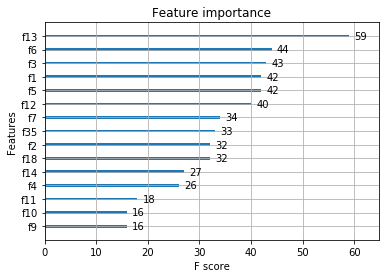

In [584]:
from xgboost import plot_importance

plt.figure(figsize=(20,4))
plot_importance(xgb, max_num_features=15)
plt.show()